# What Makes Movies Earn More Money?
#### Stephanie Qie & Nikhil Pateel

## Introduction

Movies play an important role in today's popular culture and media, as they are one of the largest forms of entertainment and one of the most profitable industries in our society.

From large movie studios to movie analysts, many people have tried to analyze what makes a movie earn more money.

In this tutorial, we will ....


## 0.0 - Required Libraries

We will be using the following libraries
+ `pandas` - For storing data
+ `matplotlib` - For plotting data
+ `sci-kit learn` - For data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm
import requests
import numpy as np

## 1.0 Dataset Source

Our dataset comes from the following source
+ [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

## 1.1 Grabbing Data

Load the .csv files which we downloaded from kaggle, and display the first few rows to have a general understanding of the data.

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
cast = pd.read_csv('tmdb_5000_credits.csv')

display(df.head())
display(cast.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## 1.3 Tidying Data

Join the two tables by movie title, so that all of the data is in one table.

In [3]:
df = df.set_index('original_title').join(cast.set_index('title'))
df = df.reset_index()
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...",...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,$upercapitalist,0,"[{""id"": 53, ""name"": ""Thriller""}]",http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,(500) Days of Summer,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...",...,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
3,...E tu vivrai nel terrore! L'aldilà,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,"[{""name"": ""Fulvia Film"", ""id"": 13682}]",...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,NaN
4,10 Cloverfield Lane,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."


As seen in the table above, some of the columns (ie. genres, production companies, production countries, spoken languages, cast, and crew) have more than element per cell. We will be converting those cells into data structures to make it easier to access all of the data in those cells.

First we will modify the genres. As shown below, a movie can have multiple genres, and each genre contains an id and name. We will make it so that for each movie, all of their genres are stored in an array, and each genre element will be a dictionary with keys for its id and name.

In [4]:
df.iloc[0]["genres"]

'[{"id": 18, "name": "Drama"}, {"id": 9648, "name": "Mystery"}, {"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]'

In [5]:
import re

#go through each row
for index, row in df.iterrows():
    
    genres = []
    line = row["genres"]
    cur_genres = line.split('},')
    
    del cur_genres[-1]
  
    #transform info for each genre
    for genre in cur_genres:
        m = re.search("(\d+), \"name\": \"(\w+)", genre)
        cur_id = m.groups()[0]
        cur_name = m.groups()[1]
        
        cur_info = {}
        cur_info["id"] = cur_id
        cur_info["name"] = cur_name
        
        genres.append(cur_info)
        
    df.at[index, "genres"] = genres

Next we will modify the production companies. As shown below, a movie can have multiple production companies, and each production company has a name and id. We will make it so that for each movie, all of their production companies are stored in an array, and each production company element will be a dictionary with keys for its name and id.

In [6]:
df.iloc[0]["production_companies"]

'[{"name": "AST Studios", "id": 75277}, {"name": "Lowland Pictures", "id": 75278}]'

In [7]:
#go through each row
for index, row in df.iterrows():
    
    p_comps = []
    line = row["production_companies"]
    cur_p_comps = line.split('},')
    
    del cur_p_comps[-1]
  
    #transform info for each genre
    for p_comp in cur_p_comps:
        m = re.search("name\": \"(.+)\", \"id\": (\d+)", p_comp)
        cur_name = m.groups()[0]
        cur_id = m.groups()[1]
        
        cur_info = {}
        cur_info["name"] = cur_name
        cur_info["id"] = cur_id
        
        p_comps.append(cur_info)
        
    df.at[index, "production_companies"] = p_comps

Now we will modify the production countries. As shown below, a movie can have multiple production countries, and each production country has an iso_3166_1 and a name.

In [8]:
df.iloc[0]["production_countries"]

'[{"iso_3166_1": "US", "name": "United States of America"}]'

In [9]:
#go through each row
for index, row in df.iterrows():
    
    p_countries = []
    line = row["production_countries"]
    cur_p_countries = line.split('},')
    
    del cur_p_countries[-1]
  
    #transform info for each genre
    for p_country in cur_p_countries:
        m = re.search("\"iso_3166_1\": \"(.+)\", \"name\": \"(.+)\"", p_country)
        cur_iso_3166_1 = m.groups()[0]
        cur_name = m.groups()[1]
        
        cur_info = {}
        cur_info["iso_3166_1"] = cur_iso_3166_1
        cur_info["name"] = cur_name
        
        p_countries.append(cur_info)
        
    df.at[index, "production_countries"] = p_countries

After this, we will modify the spoken languages. As shown below, a movie can have multiple spoken languages, and each spoken language has an iso_639_1 and a name.

In [10]:
df.iloc[0]["spoken_languages"]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [11]:
#go through each row
for index, row in df.iterrows():
    
    s_langs = []
    line = row["spoken_languages"]
    cur_s_langs = line.split('},')
    
    del cur_s_langs[-1]
  
    #transform info for each genre
    for s_lang in cur_s_langs:
        
        m = re.search("\"iso_639_1\": \"(.*)\", \"name\": \"(.*)\"", s_lang)
        
        cur_iso_639_1 = m.groups()[0]
        cur_name = m.groups()[1]

        cur_info = {}
        cur_info["iso_639_1"] = cur_iso_639_1
        cur_info["name"] = cur_name

        s_langs.append(cur_info)
        
    df.at[index, "spoken_languages"] = s_langs
    
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{'id': '18', 'name': 'Drama'}, {'id': '9648',...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{'name': 'AST Studios', 'id': '75277'}]",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,$upercapitalist,0,[],http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,[],Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,(500) Days of Summer,7500000,"[{'id': '35', 'name': 'Comedy'}, {'id': '18', ...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{'name': 'Fox Searchlight Pictures', 'id': '4...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
3,...E tu vivrai nel terrore! L'aldilà,0,[],NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,[],...,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,NaN
4,10 Cloverfield Lane,15000000,"[{'id': '53', 'name': 'Thriller'}, {'id': '878...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{'name': 'Paramount Pictures', 'id': '4'}, {'...",...,103.0,[],Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."


Subsequently, we will modify the cast. As shown below, a movie has multiple cast members, and each member has a cast_id, a character, a credit_id, a gender, an id, a name, and an order.

In [12]:
df.iloc[0]["cast"]

'[{"cast_id": 0, "character": "Alex\'s 12-Step Friend", "credit_id": "545bba84c3a3685358001b80", "gender": 1, "id": 343, "name": "Taryn Manning", "order": 1}, {"cast_id": 1, "character": "Sam\'s Mom", "credit_id": "545bba8a0e0a261fad0023f6", "gender": 1, "id": 10871, "name": "Natasha Lyonne", "order": 2}, {"cast_id": 2, "character": "Alex Cox", "credit_id": "545bba8fc3a36853500018a4", "gender": 1, "id": 2838, "name": "Chlo\\u00eb Sevigny", "order": 3}, {"cast_id": 3, "character": "Mr. Cox", "credit_id": "545bba94c3a3685353001a56", "gender": 2, "id": 9296, "name": "Balthazar Getty", "order": 4}, {"cast_id": 4, "character": "Dr. White", "credit_id": "545bba990e0a261fb900220b", "gender": 2, "id": 16327, "name": "Timothy Hutton", "order": 5}, {"cast_id": 5, "character": "Lisa", "credit_id": "545bba9ec3a368535d001e67", "gender": 1, "id": 210573, "name": "Lydia Hearst", "order": 6}, {"cast_id": 6, "character": "Mom", "credit_id": "545bbaa4c3a368535d001e6b", "gender": 0, "id": 180425, "name":

In [13]:
#go through each row
for index, row in df.iterrows():
    
    casts = []
    line = str(row["cast"])
    cur_casts = line.split('},')
    
    del cur_casts[-1]
  
    #transform info for each genre
    for cast in cur_casts:
       
        m = re.search("cast_id\": (\d*), \"character\": \"(.*)\", \"credit_id\": \"(.*)\", \"gender\": (.*), \"id\": (\d*), \"name\": \"(.*)\", \"order\": (.*)", cast)
       
        cur_cast_id = m.groups()[0]
        cur_character = m.groups()[1]
        cur_credit_id = m.groups()[2]
        cur_gender = m.groups()[3]
        cur_id = m.groups()[4]
        cur_name = m.groups()[5]
        cur_order = m.groups()[6]

        cur_info = {}
        cur_info["cast_id"] = cur_cast_id
        cur_info["character"] = cur_character
        cur_info["credit_id"] = cur_credit_id
        cur_info["gender"] = cur_gender
        cur_info["id"] = cur_id
        cur_info["name"] = cur_name
        cur_info["order"] = cur_order

        casts.append(cur_info)
        
    df.at[index, "production_countries"] = casts

Lastly, we will modify the crew. As shown below, each crew has multiple members, and each member has a credit_id, a department, a gender, an id, a job, and a name.

In [14]:
df.iloc[0]["crew"]

'[{"credit_id": "545bbac70e0a261fb6002329", "department": "Writing", "gender": 1, "id": 61111, "job": "Screenplay", "name": "Tara Subkoff"}, {"credit_id": "545bbabf0e0a261fb9002212", "department": "Directing", "gender": 1, "id": 61111, "job": "Director", "name": "Tara Subkoff"}, {"credit_id": "545bbae4c3a36853500018a8", "department": "Production", "gender": 1, "id": 61111, "job": "Producer", "name": "Tara Subkoff"}, {"credit_id": "545bbad3c3a3685358001b92", "department": "Production", "gender": 0, "id": 1382445, "job": "Producer", "name": "Jason Ludman"}, {"credit_id": "545bbadbc3a368535d001e74", "department": "Production", "gender": 0, "id": 1382446, "job": "Producer", "name": "Oren Segal"}, {"credit_id": "545bbaf3c3a3685358001b9d", "department": "Production", "gender": 0, "id": 1382448, "job": "Producer", "name": "Brendan Walsh"}]'

In [15]:
#go through each row
for index, row in df.iterrows():
    
    crews = []
    line = str(row["crew"])
    cur_crews = line.split('},')
    
    del cur_crews[-1]
   
    #transform info for each genre
    for crew in cur_crews:
        
        m = re.search("credit_id\": (.*), \"department\": \"(.*)\", \"gender\": (.*), \"id\": (.*), \"job\": (.*), \"name\": (.*)\"", crew)
       
        cur_credit_id = m.groups()[0]
        cur_department = m.groups()[1]
        cur_gender = m.groups()[2]
        cur_id = m.groups()[3]
        cur_job = m.groups()[4]
        cur_name = m.groups()[5]

        cur_info = {}
        cur_info["credit_id"] = cur_credit_id
        cur_info["department"] = cur_department
        cur_info["gender"] = cur_gender
        cur_info["id"] = cur_id
        cur_info["job"] = cur_job
        cur_info["name"] = cur_name

        crews.append(cur_info)
        
    df.at[index, "crew"] = crews

The final tidied table is shown below. Now we will being doing exploratory analysis on our data.

In [16]:
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{'id': '18', 'name': 'Drama'}, {'id': '9648',...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{'name': 'AST Studios', 'id': '75277'}]",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{'credit_id': '""545bbac70e0a261fb6002329""', '..."
1,$upercapitalist,0,[],http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,[],Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,[]
2,(500) Days of Summer,7500000,"[{'id': '35', 'name': 'Comedy'}, {'id': '18', ...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{'name': 'Fox Searchlight Pictures', 'id': '4...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{'credit_id': '""52fe47f99251416c750abaa5""', '..."
3,...E tu vivrai nel terrore! L'aldilà,0,[],NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,[],...,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,[]
4,10 Cloverfield Lane,15000000,"[{'id': '53', 'name': 'Thriller'}, {'id': '878...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{'name': 'Paramount Pictures', 'id': '4'}, {'...",...,103.0,[],Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{'credit_id': '""57627624c3a3680682000872""', '..."


We see that there's a lot of places for missing data to show up, especially in the budget/revenue categories. We shall convert them to nans here

## 2.0 - Exploratory Data Analysis

### Overral Trends

To start off our data exploration, we will create a correlation table to view the general trends and relationships within our data. 

We will only be using the key variables in our table, and we will also include a variable for missing data.

In [17]:
df['missing'] = 0

genres = []
revenues = []

#get the genre and revenue data from the table
for index, row in df.iterrows():
    l = list(map(lambda e: e['name'], row['genres']))
    genres += l;
    revenues += [row['revenue']] * len(row['genres'])

#find the missing data in the table    
for index, row in df.iterrows():
    
    missing = 0
    
    #if the budget is missing
    if row['budget'] == 0:
        missing += 1
        
    #if the genres are missing    
    if row['genres'] == []:
        missing += 1
        
    #if the homepage is missing    
    if row['homepage'] == np.NaN:
        missing += 1
        
    #if the keywords are missing    
    if row['keywords'] == []:
        missing += 1
        
    #if the production companies are missing    
    if row['production_companies'] == []:
        missing += 1
        
    #if the production countries are missing    
    if row['production_countries'] == []:
        missing += 1
        
    #if the spoken languages are missing    
    if row['spoken_languages'] == []:
        missing += 1
        
    #if the revenue is missing    
    if row['revenue'] == 0:
        missing += 1 
        
    #if the tagline is missing    
    if row['tagline'] == np.NaN:
        missing += 1
        
    #if the cast info is missing    
    if row['cast'] == np.NaN:
        missing += 1
        
    #if the crew info is missing    
    if row['crew'] == np.NaN:
        missing += 1
    
    df.at[index, 'missing'] = missing

In [18]:
display(df.corr())

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,missing
budget,1.000000,-0.089163,0.505545,0.730603,0.269966,0.093112,0.593224,-0.086309,-0.422248
id,-0.089163,1.000000,0.031267,-0.050527,-0.153521,-0.270644,-0.004113,0.999903,0.241596
popularity,0.505545,0.031267,1.000000,0.644725,0.225761,0.273952,0.778214,0.044541,-0.331544
revenue,0.730603,-0.050527,0.644725,1.000000,0.251344,0.197337,0.781471,-0.046466,-0.324332
runtime,0.269966,-0.153521,0.225761,0.251344,1.000000,0.375036,0.272258,-0.157726,-0.291237
vote_average,0.093112,-0.270644,0.273952,0.197337,0.375036,1.000000,0.313024,-0.267474,-0.290222
vote_count,0.593224,-0.004113,0.778214,0.781471,0.272258,0.313024,1.000000,0.005814,-0.328812
movie_id,-0.086309,0.999903,0.044541,-0.046466,-0.157726,-0.267474,0.005814,1.000000,0.239065
missing,-0.422248,0.241596,-0.331544,-0.324332,-0.291237,-0.290222,-0.328812,0.239065,1.000000


From the correlation table, it is clear that there are noticeable relationships between several of the variables, such as one  between revenue and budget. It is also interesting to note how there appears to be a relationship between revenue and missing data, as it appears that if a movie earns more money, it is less likely to have missing data in the table.

We will explore these relationships below, excluding the relationships that are inconsequential such as the correlation between revenue and runtime or id

First, we start by changing the 0s in budget/revenue to nans to get avoid messing up our data

In [19]:
columns = ['budget', 'revenue']
df[columns] = df[columns].replace(0, np.nan)

### Relationship Between Revenue and Budget

Now we will explore the relationship between revenue and budget.

We will first create a histogram of the movies' revenues.

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of Revenue')

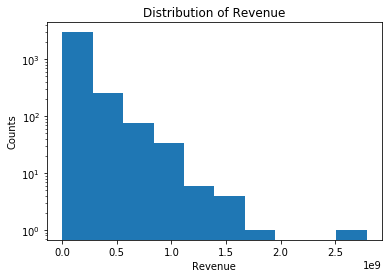

In [20]:
plt.figure()
display()
n, bins, patches = plt.hist(df['revenue'], log=True)
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Distribution of Revenue')

As shown in the histogram, the majority of movies have low revenues, and only a few have high revenues.

Now we will create a histogram for the movies' budgets.

Text(0.5, 1.0, 'Distribution of Budget')

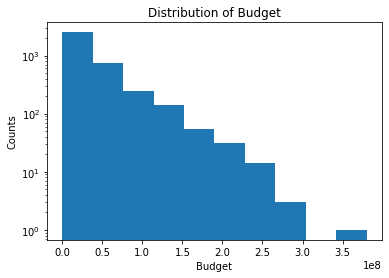

In [21]:
plt.figure()
display()
n, bins, patches = plt.hist(df['budget'], log=True)
plt.xlabel('Budget')
plt.ylabel('Counts')
plt.title('Distribution of Budget')

Just like the revenues, most of the movies have low budgets. As shown in the histogram, as the budget increases, there are fewer movies.

Now we will create a histogram that shows the counts for both revenue and budget to compare them to analyze their similarities and differences.

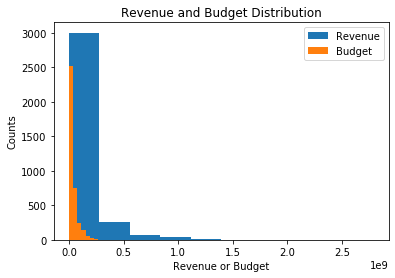

In [22]:
sort = df.sort_values('revenue', ascending=False )

plt.figure()
plt.hist(df['revenue'], label = 'Revenue') #blue
plt.hist(df['budget'], label = 'Budget') #orange
plt.xlabel('Revenue or Budget')
plt.ylabel('Counts')
plt.title('Revenue and Budget Distribution')
plt.legend()

It is clear that the revenue and budget have very similar trends, as their graphs are nearly identical. This demonstrates how there is a clear correlation between movies' revenues and budgets, and how the majority of movies have low budgets and therefore produce low revenues.

To make the trend even more clear, we will create a scatterplot of revenue vs. budget.

Text(0.5, 1.0, 'Revenue vs. Budget')

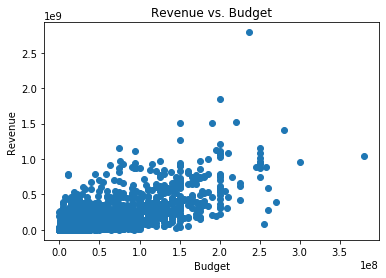

In [23]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs. Budget')

As shown in the scatterplot, there is a positive linear correlation between the revenue and budget. As the budget increases, the revenue increases as well. This shows how the budget plays a critical role in how much a movie ends up earning.

### Relationship Between Revenue and Vote Average

We will create a scatterplot between revenue and vote average to see the relationship between these two variables.

Text(0.5, 1.0, 'Revenue vs. Vote Average')

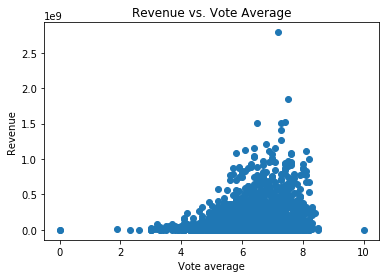

In [24]:
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Vote average')
plt.ylabel('Revenue')
plt.title('Revenue vs. Vote Average')

This scatterplot has unexpected results, because there doesn't seem to be a clear relationship between vote average and revenue. Even though it would seem like a movie would have a higher vote average if it has more revenue, it appears that the vote average is not completely related to how much it ends up making. It seems like the majority of vote averages hovers in the 6-8 range regardless of a movie's budget.

This information is good to know, because now we know that vote average does not play an important role in how much a movie makes.

### Relationship between Revenue and Popularity

Text(0.5, 1.0, 'Popularity vs. Vote Average')

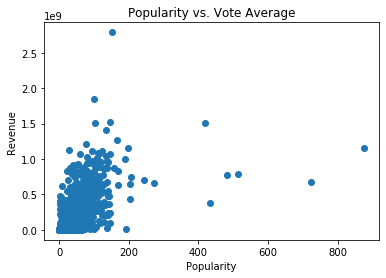

In [25]:
plt.scatter(df['popularity'], df['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs. Vote Average')

We see that even though the correlation between revenue and popularity is high, there doesn't appear to be a strong relationship between the two values. It would be overfitting to use this variable in our ML algorithm, so we'll choose to not use the data for now.

### Relationship Between Revenue and Genre

We will create a bar chart for the average revenue vs. genre, to see if there is a correlation between a movie's genre and how much movie they make.

Before we create the chart, we have to find all of the unique genres in the data and then calculate the average revenue for each genre.

In [26]:
genre_revenue = {}
genre_count = {}

data = {'genre' : genres, 'revenue' : revenues}
data = pd.DataFrame(data)

#get the data
for index, row in data.iterrows():
    
    cur_genre = row["genre"]
    cur_revenue = row["revenue"]
    
    #if has seen the genre before
    if cur_genre in genre_revenue:
        genre_revenue[cur_genre] += cur_revenue
        genre_count[cur_genre] += 1
        
    #if haven't seen the genre before    
    else:
        genre_revenue[cur_genre] = cur_revenue
        genre_count[cur_genre] = 1
        
genre_avg_revenue = {}

#calculate the average revenue for each genre
for genre in genre_revenue.keys():
    genre_avg_revenue[genre] = genre_revenue[genre] / genre_count[genre]

Now that we've calculated the average revenue of movies for each genre, we can create the bar chart.

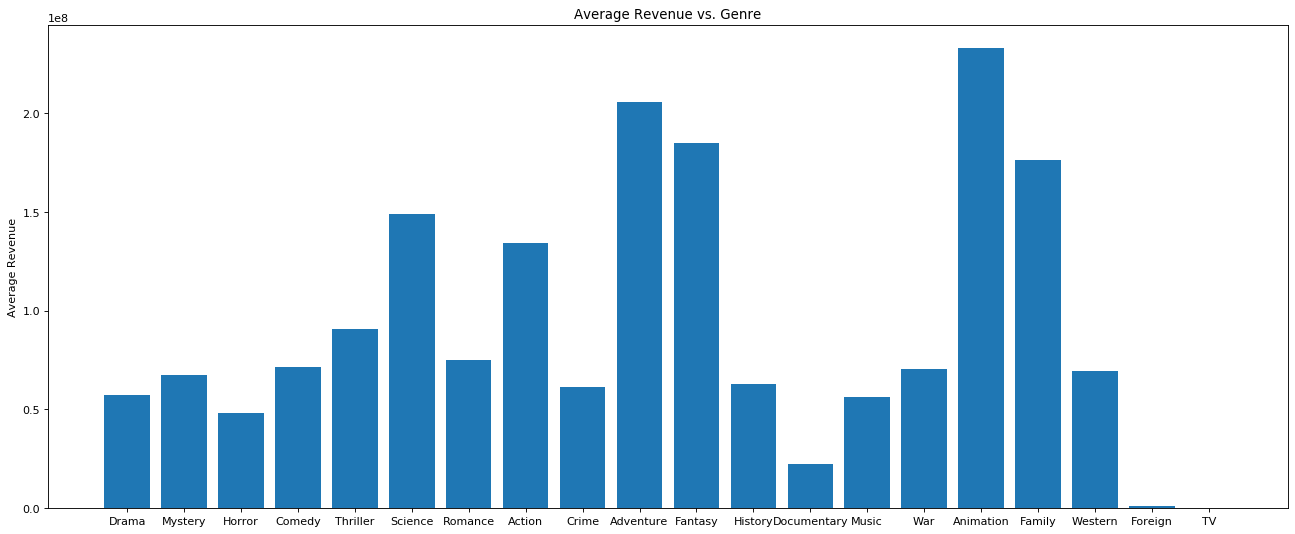

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

objects = genre_avg_revenue.keys()
y_pos = np.arange(len(objects))
performance = genre_avg_revenue.values()

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs. Genre')

plt.show()

Some of the observations we can get from the graph are that animation, adventure, and fantasy are the genres that have the highest average revenue per movie. The genres that have the lowest average revenue per movie are TV, foreign, and documentary.

From this bar chart, it is clear that a movie's genre impacts how much revenue they end up earning, as shown by how certain genres earn much more than other genres.

### Relationship Between Revenue and Production Companies

First we will create a histogram of how many movies production companies make.

Text(0.5, 1.0, 'Movies Produced vs. Number of Production Companies')

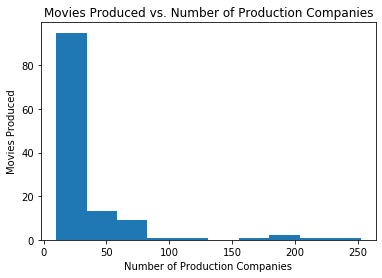

In [28]:
all_prod_comps = {}

for index, row in df.iterrows():
    prod_comps = row["production_companies"]
    
    for p_c in prod_comps:
        if p_c["name"] in all_prod_comps:
            all_prod_comps[p_c["name"]] += 1
        else:
            all_prod_comps[p_c["name"]] = 1
        
all_prod_comps
reduced = dict( (key, value) for (key, value) in all_prod_comps.items() if value >= 10 )
n, bins, patches = plt.hist(reduced.values())
plt.xlabel('Number of Production Companies')
plt.ylabel('Movies Produced')
plt.title('Movies Produced vs. Number of Production Companies')

As shown in the graph, there are only a few production companies that produce many movies, while the majority of companies only produce a small number of movies. 

Now we will create a bar plot to find the relationship between average revenue and the number of movies a production company has produced.

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Average Revenue vs. Number of Movies A Production Company Produced')

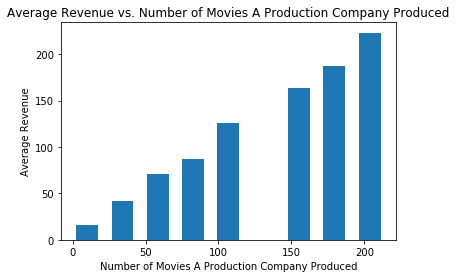

In [29]:
x = []
y = []
for i in range(len(bins) - 1):
    start = bins[i]
    end = bins[i+1]
    x.append(start)
    reduced = list(  value for (key, value) in all_prod_comps.items() if value >= start and value < end )
    y.append(np.mean(reduced))

plt.figure()
plt.bar(x,y, width=15)
plt.xlabel('Number of Movies A Production Company Produced')
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs. Number of Movies A Production Company Produced')

From this graph, it is clear that if a movie is produced by a production company that has made many movies in the past, it will have a higher average revenue. This shows that a movie's production company/companies will impact its revenue.

Now lets analyze our data!

## 3.0 - Analysis

### Regression with sklearn

In [30]:
from sklearn.linear_model import LinearRegression

feature_list = ['budget', 'popularity' , 'vote_count']
X = []
Y = []


dt = df.dropna()
for index, row in dt.iterrows():
    X.append([row["budget"], row["popularity"], row["vote_count"]])
    Y.append(row["revenue"])

[1.9304871382177264, 172832.0503461979, 70392.81365118944]

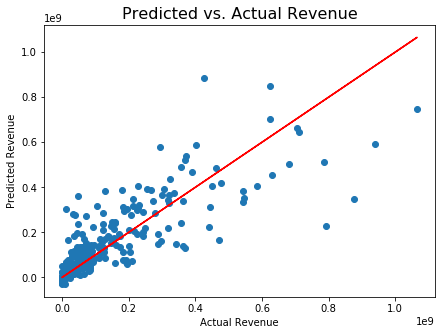

In [31]:
from sklearn.datasets import make_classification

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

c = lm.coef_.tolist()
display(c)

pred = lm.predict(X_test)

plt.figure(figsize=(7,5))
plt.title("Predicted vs. Actual Revenue", fontsize=16)
plt.scatter(Y_test,pred)
plt.plot(Y_test, Y_test, color = "Red") 
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

### Predictions Using Random Forests

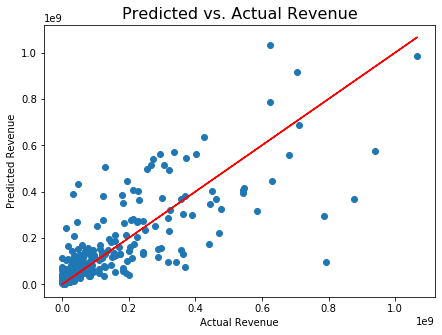

In [33]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(100)

model = clf.fit(X_train, Y_train)

pred = clf.predict(X_test)

plt.figure(figsize=(7,5))
plt.title("Predicted vs. Actual Revenue", fontsize=16)
plt.scatter(Y_test,pred)
plt.plot(Y_test, Y_test, color = "Red") 
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

In [ ]:
classifiers = {'Linear Regression' : linreg, 'Support Vector Regression' : svr}

n = target.shape[0]
error = []
i = 0
for name,regressor in classifiers.items():
    score = model_selection.cross_val_score(regressor, data, targ, cv=10, scoring='neg_mean_squared_error')
    error.append(-score)
    stderror = error[i] / np.sqrt(n)
    print("{} error: {}, stderror: {}".format(name, error[i], stderror[i]))
    i = i + 1
    
# H_0 is that error of linear > error of svr
diff = error[0] - error[1]
diffBar = np.mean(diff)
sdDiff = np.sqrt(np.sum(np.square(diff - diffBar)) / 9)
seDiff = sdDiff / np.sqrt(n)
t = diffBar / seDiff
pval = stats.t.sf(t, 9)

print("Null Hypothesis: LR_Error = SVR_Error\nAlternative Hypothesis: LR_Error > SVR_Error")
print("Mean Difference: {}, Test statistic t: {}, P-Val: {}".format(diffBar, t, pval))

1) Multiple linear regression!


* Dependent variable: Revenue
* Independent variables: Budget, genre, production companies, popularity, runtime

2) Hypothesis testing (statistically significant dimensions?)
 

3) Predicting stuff with machine learning / Try Nonlinear (Fine-tune it)

4) Cross validation + paired T tests

Ideas:

Linear regression (games example)

List all possible variables, eliminate ones that aren't important, create a new table, more exploration, multiple linear regression, prediction with machine learning, hypothesis testing (football example)

Hypothesizing data and finding how much more faculty UMD should add (UMD cs faculty example)

## Insights

Other notes:

Can add pictures to make the tutorial look more interesting

Add more english explanation stuff

Can add heat map for the correlation table